In [1]:
import numpy as np
import pandas as pd
import logging
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Constants
from lib.mmsbm import MMSBM

train = "train.csv"
test = "test.csv"
sampling = 6
# Number of groups of users
k = 4
# Number of groups of items
l = 6
# Iterations
# To plateau the coefficients the minimum is 600
iterations = 400

In [3]:
mmsbm = MMSBM(
    train_set=train,
    test_set=test,
    user_groups=k,
    item_groups=l,
    iterations=iterations,
    sampling=sampling,
    seed=1714,
    notebook=True
)
return_dict = mmsbm.process()
s_prs, accuracy, mae, s2, s2pond, rat, lkh, theta, eta = mmsbm.postprocess(return_dict)

INFO:MMSBM:Running 6 runs of 400 iterations.
INFO:MMSBM:Done 6 runs in 3.72 minutes.
INFO:MMSBM:We had an accuracy of 0.4683360927152318, a MAE of 0.6059602649006622 and s2 and weighted s2 of 4095 and 3991.


In [4]:
logger = logging.getLogger()
logger.setLevel(level=logging.INFO)

In [6]:
# broken
"""
temp = np.array(s_prs["1"])
ev = pd.DataFrame(temp.reshape((temp.shape[0], temp.shape[1] * temp.shape[2] * temp.shape[3])))
ev["iteration"] = ev.index + 1
ev = ev.melt(id_vars="iteration", value_vars=list(ev.columns[:-1]))
g = sns.lineplot(x="iteration", y="value", hue="variable", data=ev)
g.set(xlabel='Iteration', ylabel='Coefficients')
g.legend_.remove()
"""

IndexError: tuple index out of range

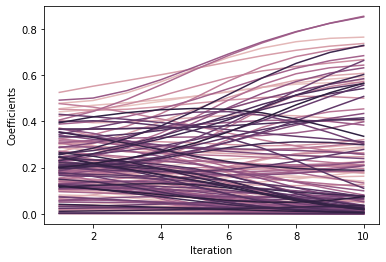

<AxesSubplot:>

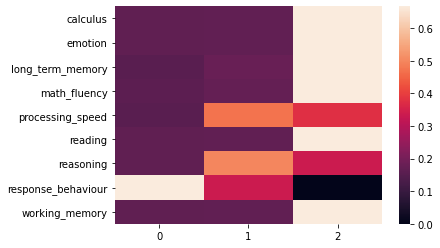

In [7]:
# Groups of tests
areas = {
    1: "calculus",
    2: "emotion",
    3: "long_term_memory",
    4: "math_fluency",
    5: "processing_speed",
    6: "reading",
    7: "reasoning",
    8: "response_behaviour",
    9: "working_memory"
}
eta.index = areas.values()
sns.heatmap(eta)

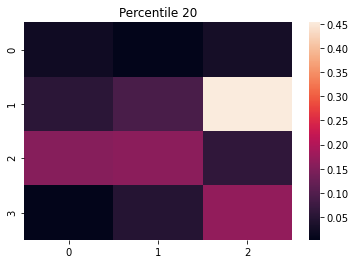

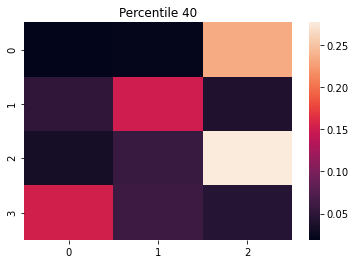

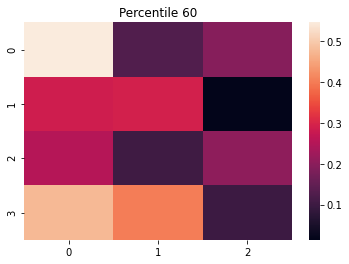

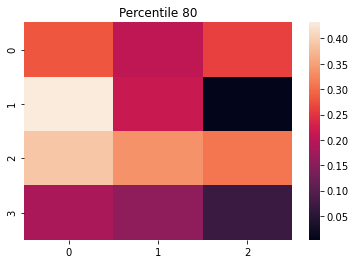

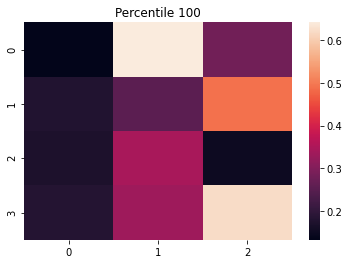

In [10]:
# Probability distributions
for i, prs in s_prs.items():
    ax = plt.axes()
    sns.heatmap(prs, ax = ax)

    ax.set_title(f"Percentile {int(i) * 20}")
    plt.show()

<AxesSubplot:>

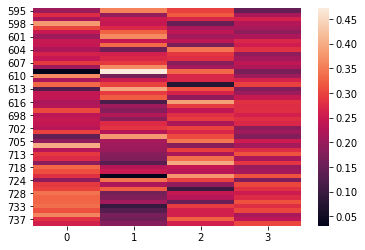

In [11]:
# Observations belonging to groups
sns.heatmap(theta.iloc[:50, :])

          1         2         3         4         5
0  0.021715  0.018735  0.546289  0.279799  0.133462
1  0.004570  0.021418  0.127807  0.205029  0.641177
2  0.029368  0.234262  0.193087  0.261257  0.282026


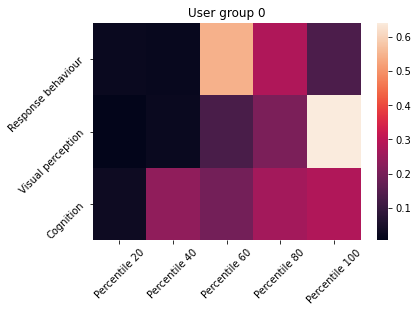

          1         2         3         4         5
0  0.054822  0.051891  0.284436  0.431681  0.177170
1  0.090322  0.150273  0.291360  0.214397  0.253648
2  0.452694  0.040038  0.013866  0.002959  0.490443


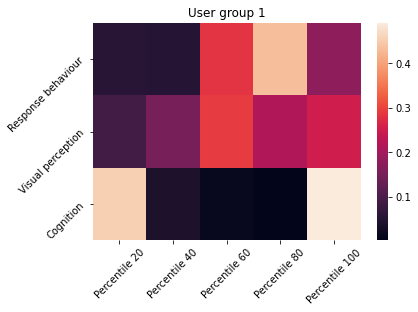

          1         2         3         4         5
0  0.154691  0.032952  0.251396  0.389800  0.171161
1  0.159616  0.057932  0.103154  0.335575  0.343723
2  0.060389  0.277422  0.203203  0.308626  0.150361


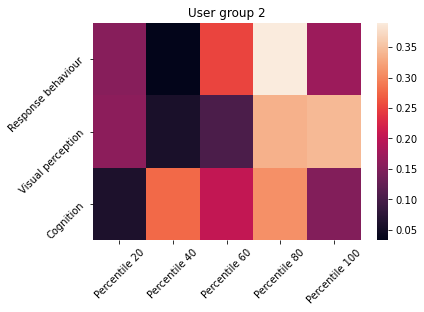

          1         2         3         4         5
0  0.003417  0.153102  0.476872  0.183760  0.182848
1  0.048583  0.060473  0.401718  0.157163  0.332063
2  0.167010  0.044383  0.098550  0.069402  0.620654


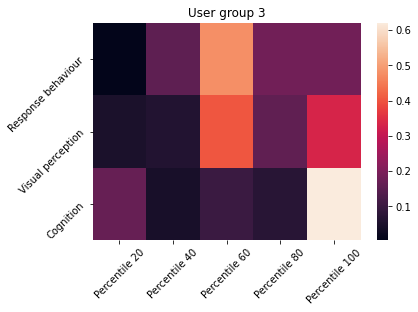

In [27]:
# Let's try to understand the four groups better
df = pd.concat(s_prs, axis=0).swaplevel()

for i in set(df.index.get_level_values(0)):
    temp = df[df.index.isin([int(i)], level=0)].droplevel(0).transpose()
    ax = plt.axes()
    sns.heatmap(temp, ax = ax)
    ax.set_xticklabels([f"Percentile {int(a) * 20}" for a in s_prs.keys()])
    ax.set_yticklabels(["Response behaviour", "Visual perception", "Cognition"])
    plt.xticks(rotation=45)
    plt.yticks(rotation=45)

    ax.set_title(f"User group {i}")
    plt.show()

coses a fer:
- mirar que les normalitzacions estiguin bé
- venetian blinds test set i accuracy com déu mana
- trobar millors k i l
- 5-fold CV per calcular l'accuracy
- random forest per comparar: tant amb valors reals com amb percentils
- percentil real vs predit per prova

- mirar doctorat industrial

In [28]:
# Output stuff
deta.to_csv("eta.csv")
dtheta.to_csv("theta.csv")
for i in range(prs.shape[2]):
    pd.DataFrame(prs[:, :, i]).to_csv(f"prs_{i}.csv")

NameError: name 'deta' is not defined